In [123]:
import numpy as np
import pandas as pd

In [124]:
ratings = pd.read_csv("/kaggle/input/book-recommendation-dataset/Ratings.csv")
books = pd.read_csv("/kaggle/input/book-recommendation-dataset/Books.csv")
users = pd.read_csv("/kaggle/input/book-recommendation-dataset/Users.csv")

<ipython-input-124-77983041bafe>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("/kaggle/input/book-recommendation-dataset/Books.csv")


In [125]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


#POPULARITY BASED RECOMMENDATION

In [126]:
ratings_books = ratings.merge(books, on='ISBN')

In [127]:
num_ratings = ratings_books.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_ratings.rename(columns={'Book-Rating':'num_rating'},inplace = True)
num_ratings

,Book-Title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [128]:
ratings_books['Book-Rating'] = pd.to_numeric(ratings_books['Book-Rating'], errors='coerce')
ratings_books['Book-Ratings'] = ratings_books['Book-Rating'].fillna(0)
avg_ratings = ratings_books.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_ratings = avg_ratings.dropna()
avg_ratings.rename(columns={'Book-Rating':'avg_rating'},inplace = True)
avg_ratings

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [129]:
new = num_ratings.merge(avg_ratings,on = 'Book-Title')
new

,Book-Title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [130]:
new_ratings = new[new['num_rating']>=250].sort_values('avg_rating', ascending = False)

In [131]:
new_ratings

,Book-Title,num_rating,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...,...
227701,Vinegar Hill (Oprah's Book Club (Paperback)),265,2.245283
233635,Whispers,286,2.199301
143377,Presumed Innocent,294,2.139456
94382,Isle of Dogs,288,2.000000


In [132]:
new_ratings = new_ratings.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Image-URL-M', 'num_rating', 'avg_rating']]  

COLLABORATIVE FILTERING BASED

In [133]:
x = ratings_books.groupby('User-ID').count()['Book-Rating'] > 200
user = x[x].index

In [134]:
filtered_ratings = ratings_books[ratings_books['User-ID'].isin(user)]

In [135]:
y = filtered_ratings.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [136]:
final_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(famous_books)]

In [137]:
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Ratings
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,10
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,0
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,0
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,9
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,0
...,...,...,...,...,...,...,...,...,...,...,...
1029196,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...,0
1029197,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,0
1029270,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,0
1029309,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,9


In [138]:
final_ratings.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Ratings
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,10
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,0
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,0
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,9
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,0
...,...,...,...,...,...,...,...,...,...,...,...
1029196,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...,0
1029197,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,0
1029270,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,0
1029309,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,9


In [139]:
df = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [140]:
df.fillna(0,inplace=True)
df

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
from sklearn.metrics.pairwise import cosine_similarity

In [142]:
similarity_score = cosine_similarity(df)

In [143]:
def recommend(book_name):
    index = np.where(df.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])), key=lambda x:x[1], reverse = True)[1:11]
    for i in similar_items:
        temp = books[books['Book-Title'] == df.index[i[0]]]
        print(temp.drop_duplicates('Book-Title')['Book-Author'])

In [144]:
recommend('The Notebook')

5607    Nicholas Sparks
Name: Book-Author, dtype: object
226    Nicholas Sparks
Name: Book-Author, dtype: object
4173    Dean R. Koontz
Name: Book-Author, dtype: object
995    Robin Cook
Name: Book-Author, dtype: object
107    Mitch Albom
Name: Book-Author, dtype: object
776    Nicholas Sparks
Name: Book-Author, dtype: object
786    James Patterson
Name: Book-Author, dtype: object
1926    Stephen King
Name: Book-Author, dtype: object
775    Nicholas Sparks
Name: Book-Author, dtype: object
10643    Danielle Steel
Name: Book-Author, dtype: object


In [145]:
df_matrix = df.values

In [146]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(df_matrix)
type(book_sparse)

scipy.sparse._csr.csr_matrix

In [147]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm= 'brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [148]:
distances, indices = model.kneighbors(book_sparse, n_neighbors=3)
predicted_matrix = np.zeros(book_sparse.shape)

for i, neighbors in enumerate(indices):
    for neighbor in neighbors:
        predicted_matrix[i, :] += df_matrix[neighbor, :]

predicted_matrix /= len(neighbors)
print(predicted_matrix)

[[3.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         3.33333333 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


Precision@14: 0.8054
Recall@14: 0.6718
Accuracy@14: 0.8054
F1-Score: 0.7325772142168451


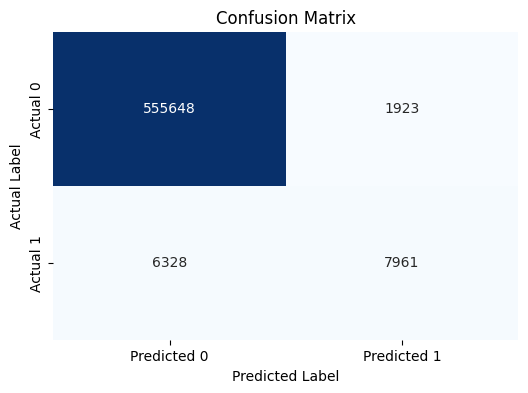

In [149]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def precision_recall_accuracy_at_k(true_matrix, predicted_matrix, k=5):
    precision_values = []
    recall_values = []
    accuracy_values = []
    y_true = []  
    y_pred = []  
    
    num_users = true_matrix.shape[0]
    
    for user_id in range(num_users):
        if isinstance(true_matrix, np.ndarray):
            relevant_items = np.where(true_matrix[user_id, :] > 0)[0]
        else:
            relevant_items = true_matrix.iloc[user_id, :].to_numpy().nonzero()[0]
        
        if len(relevant_items) == 0:
            continue
        
        if isinstance(predicted_matrix, np.ndarray):
            predicted_scores = predicted_matrix[user_id, :]
        else:
            predicted_scores = predicted_matrix.iloc[user_id, :].to_numpy()
        
        top_k_items = np.argsort(predicted_scores)[::-1][:k]
        
        
        true_positive = len(set(top_k_items) & set(relevant_items))
        precision = true_positive / k
        recall = true_positive / len(relevant_items)
        precision_values.append(precision)
        recall_values.append(recall)
        
        correct_predictions = true_positive
        total_predictions = k
        accuracy = correct_predictions / total_predictions
        accuracy_values.append(accuracy)
        
        y_true.extend([1 if i in relevant_items else 0 for i in range(true_matrix.shape[1])])
        y_pred.extend([1 if i in top_k_items else 0 for i in range(true_matrix.shape[1])])
    
    precision = np.mean(precision_values)
    recall = np.mean(recall_values)
    accuracy = np.mean(accuracy_values)
    
    cm = confusion_matrix(y_true, y_pred)
    
    return precision, recall, accuracy, cm

precision, recall, accuracy, cm = precision_recall_accuracy_at_k(df, predicted_matrix, k=14)

print(f"Precision@14: {precision:.4f}")
print(f"Recall@14: {recall:.4f}")
print(f"Accuracy@14: {accuracy:.4f}")
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print(f"F1-Score: {f1_score}")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

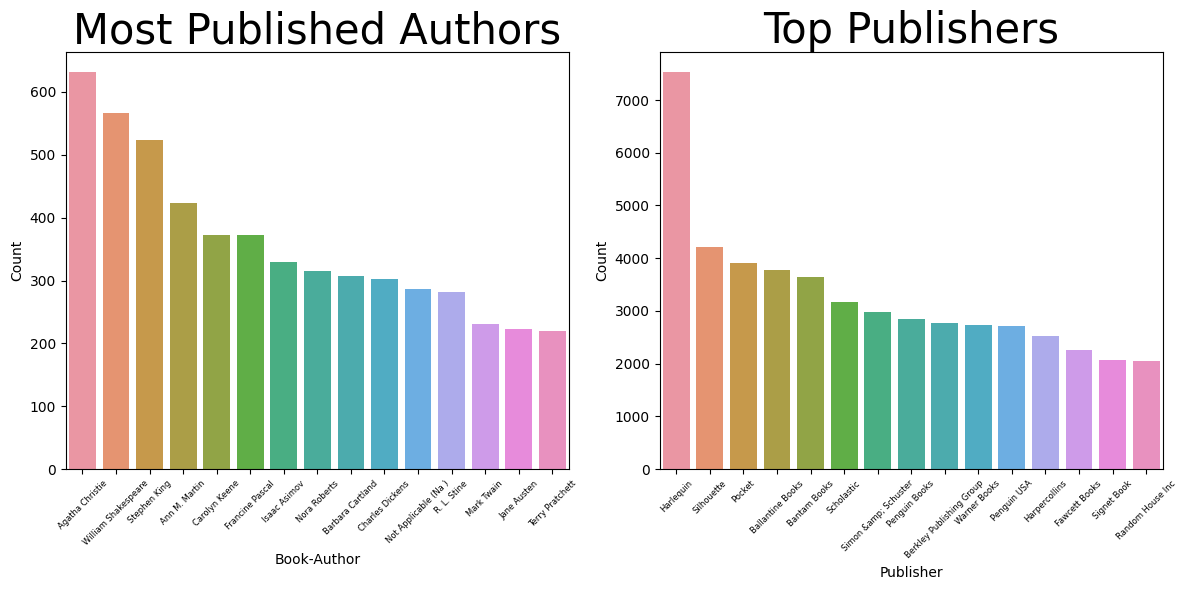

In [150]:
author_count = books['Book-Author'].value_counts().reset_index(name='Count').sort_values('Count', ascending=False).head(15)

publisher_count = books['Publisher'].value_counts().reset_index(name='Count').sort_values('Count', ascending=False).head(15)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.barplot(data=author_count, x='Book-Author', y='Count', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=6)
ax1.set_title('Most Published Authors', size=30)

ax2 = sns.barplot(data=publisher_count, x='Publisher', y='Count', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize=6)
ax2.set_title('Top Publishers', size=30)

plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

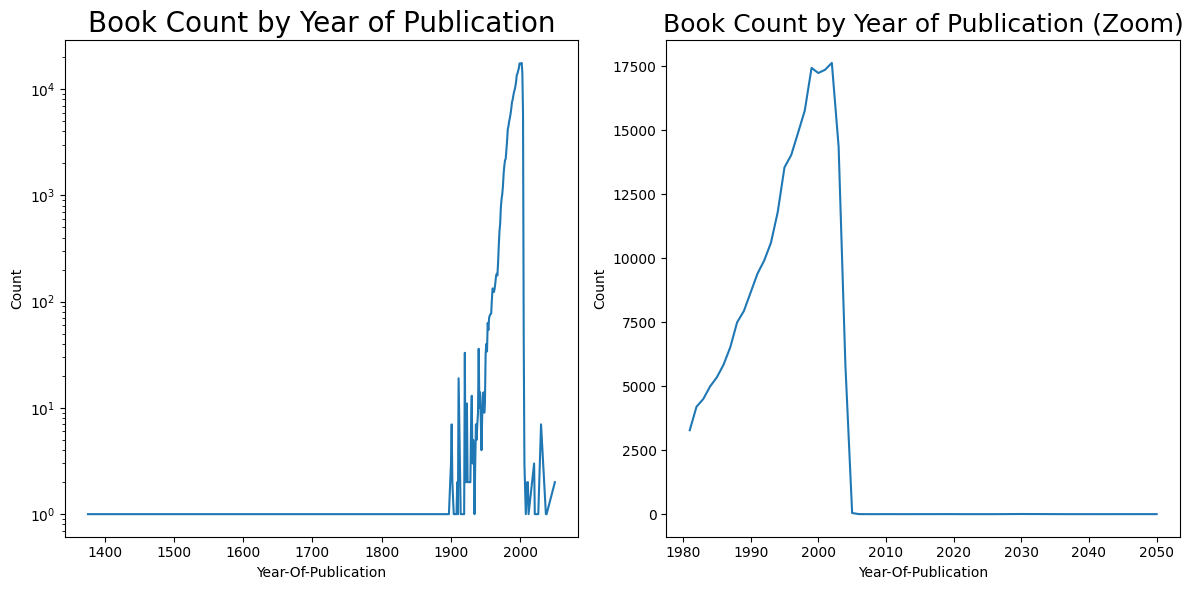

In [151]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
books = books.dropna(subset=['Year-Of-Publication']) 
books_by_year = books[books['Year-Of-Publication'] != 0]['Year-Of-Publication'].value_counts().reset_index(name='Count')
books_by_year = books_by_year.sort_values('Year-Of-Publication', ascending=True) 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

if not books_by_year.empty:
    sns.lineplot(data=books_by_year, x='Year-Of-Publication', y='Count', ax=ax1)
    ax1.set_yscale('log')
    ax1.set_title('Book Count by Year of Publication', fontsize=20)
else:
    print("No data to plot for ax1.")

if not books_by_year[books_by_year['Year-Of-Publication'] > 1980].empty:
    sns.lineplot(data=books_by_year[books_by_year['Year-Of-Publication'] > 1980], x='Year-Of-Publication', y='Count', ax=ax2)
    ax2.set_title('Book Count by Year of Publication (Zoom)', fontsize=18)
else:
    print("No data to plot for ax2.")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


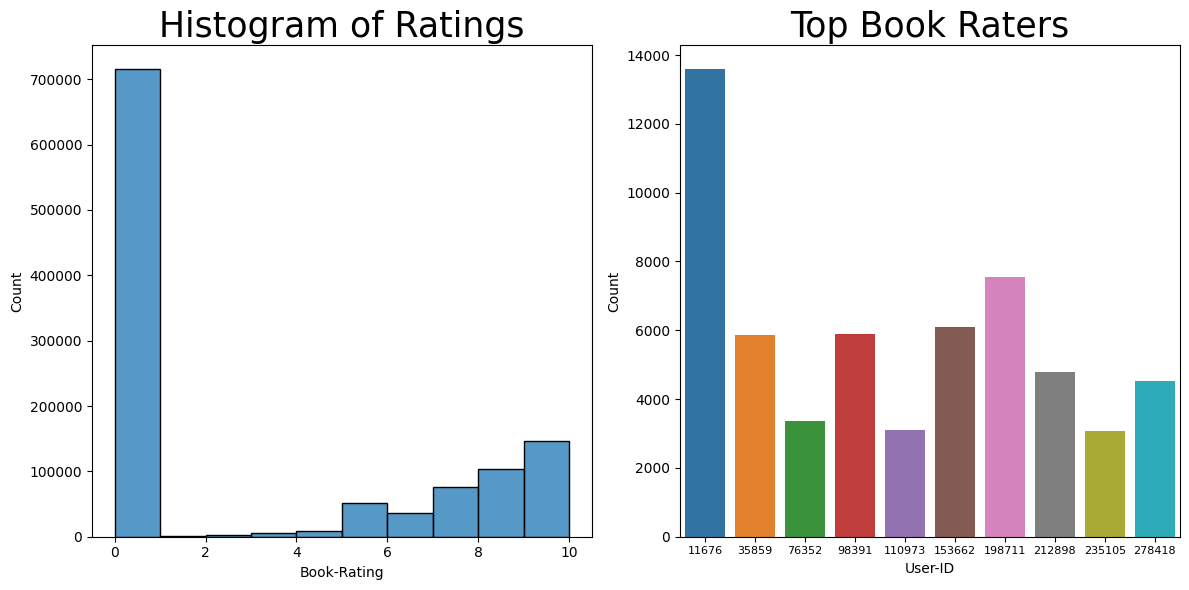

In [152]:
user_count = ratings['User-ID'].value_counts().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(ratings, x='Book-Rating', ax=ax1, bins=10)
ax1.set_title('Histogram of Ratings', size=25)

ax2 = sns.barplot(data=user_count, x='User-ID', y='Count', ax=ax2)
ax2.set_title('Top Book Raters', size=25)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=8)

plt.tight_layout()

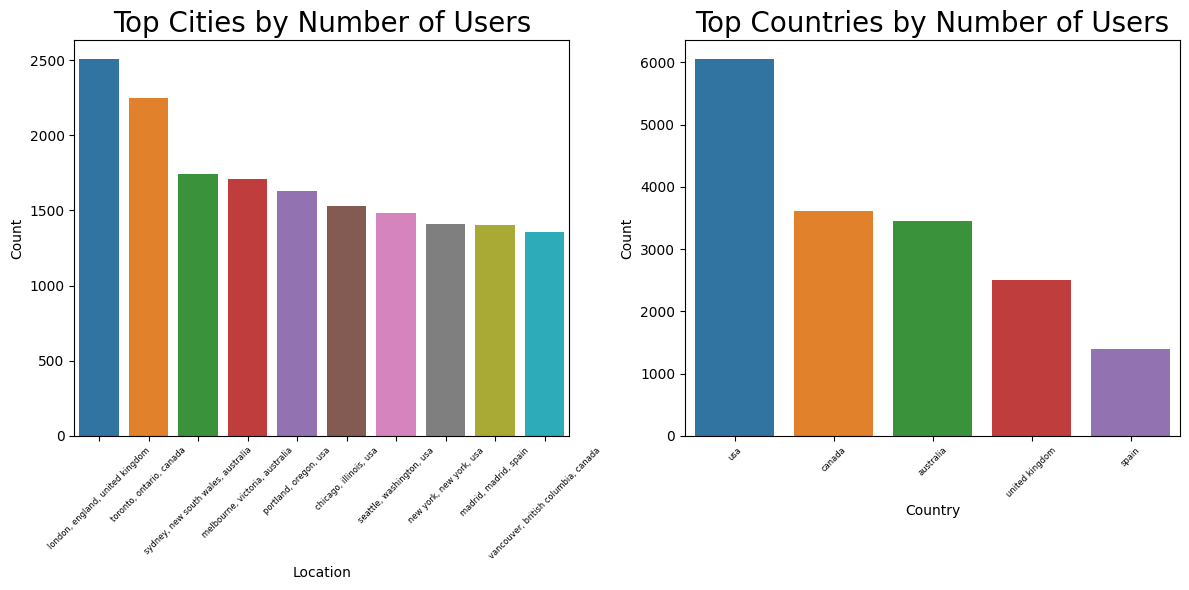

In [153]:
top_locations = users['Location'].value_counts().reset_index(name='Count').sort_values('Count', ascending=False).head(10)

top_locations['Country'] = top_locations['Location'].apply(lambda x: x.split(', ')[2])

top_countries = top_locations.groupby('Country')['Count'].sum().reset_index(name='Count').sort_values('Count', ascending=False).head(10)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.barplot(data=top_locations, x='Location', y='Count', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, size=6)
ax1.set_title('Top Cities by Number of Users', size=20)

ax2 = sns.barplot(data=top_countries, x='Country', y='Count', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, size=6)
ax2.set_title('Top Countries by Number of Users', size=20)

plt.tight_layout()

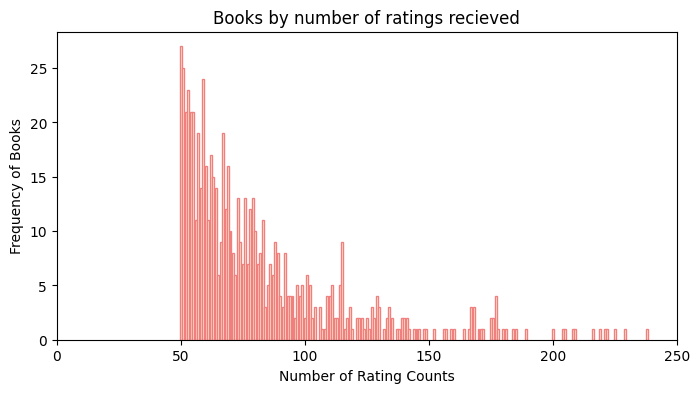

In [154]:
book_rating_counts = final_ratings.groupby('Book-Title')['Book-Rating'].count()
rating_frequencies = book_rating_counts.value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.bar(rating_frequencies[:500].index, rating_frequencies[:500].values, color='Cornsilk', edgecolor='LightCoral')

plt.xlim(0, 250)

plt.title('Books by number of ratings recieved')
plt.xlabel('Number of Rating Counts')
plt.ylabel('Frequency of Books')
plt.show()

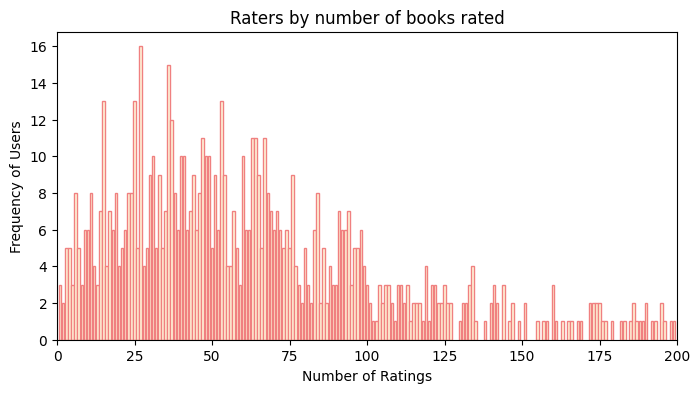

In [155]:
user_rating_counts = final_ratings.groupby('User-ID')['Book-Rating'].count()
rating_frequencies = user_rating_counts.value_counts().sort_index()
plt.figure(figsize=(8, 4))
plt.bar(rating_frequencies.index, rating_frequencies.values, color='Cornsilk', edgecolor='LightCoral')

plt.xlim(0, 200)

plt.title('Raters by number of books rated')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency of Users')
plt.show()

In [156]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import GridSearchCV

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(final_ratings[['User-ID', 'Book-Title', 'Book-Rating']], reader)

param_grid = {
    'n_epochs': [10, 20, 30],  
    'lr_all': [0.002, 0.005, 0.01],  
    'reg_all': [0.02, 0.1, 0.4]  
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(f"Best RMSE: {gs.best_score['rmse']}")
print(f"Best MAE: {gs.best_score['mae']}")
print(f"Best Parameters: {gs.best_params['rmse']}")

best_model = gs.best_estimator['rmse']
best_model.fit(data.build_full_trainset())

Best RMSE: 3.2497935602680403
Best MAE: 2.6221566729872614
Best Parameters: {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.4}
